In [1]:
import turbo as tb
import rul_dataframe as rd
import plots as pl
import preprocessing as pre
import classification as cls

In [199]:
dataset = 4
sensors = ['s2', 's7', 's14', 's21']

# custom functions for loading data (turbo.py)
tr, te, rl = tb.getTFDataset(set = dataset)
tb.addTFlinear(tr, te, rl)

# data frame extension for RUL
tr_df = rd.RUL_DataFrame(df = tr, label_cols = ['linear'])
plot = pl.Plots(tr_df)

In [200]:
preproc = pre.Preprocessing()
classy = cls.Classification()

Scaling

In [201]:
if dataset in [1,3]:
    preproc.drop_zero_variance(tr_df)
    preproc.scale(tr_df, scale = 'minmax')
elif dataset in [2, 4]:
    classy.fit_kmeans(tr_df)
    preproc.one_hot_encode(tr_df)
    preproc.c_drop_zero_variance(rul_df = tr_df , c_cols = tr_df.categ_cols)
    preproc.c_scale(rul_df = tr_df , c_cols = tr_df.categ_cols, scale = 'minmax')

Moving Average

Before:


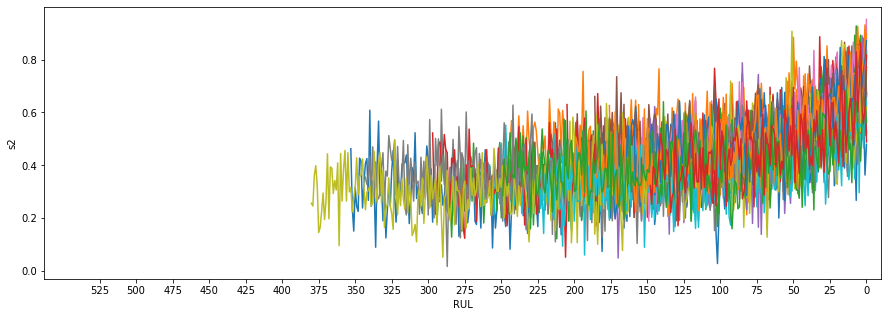

After Moving Average:


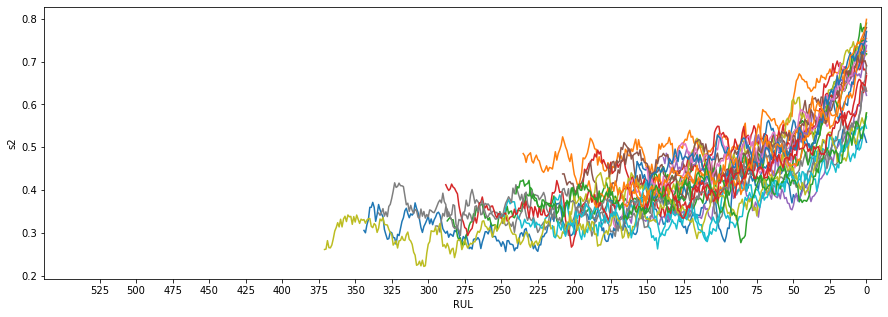

Before:


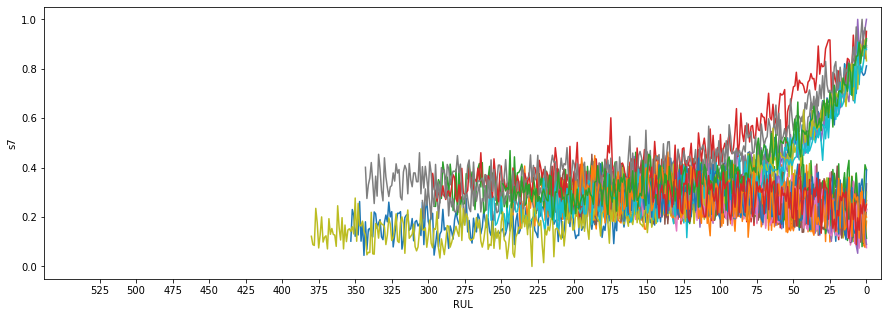

After Moving Average:


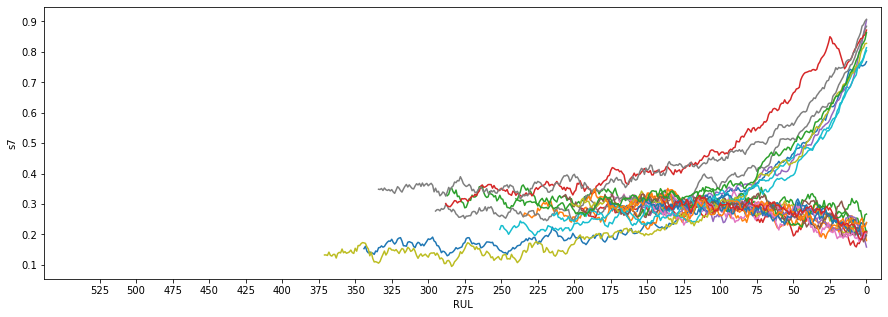

Before:


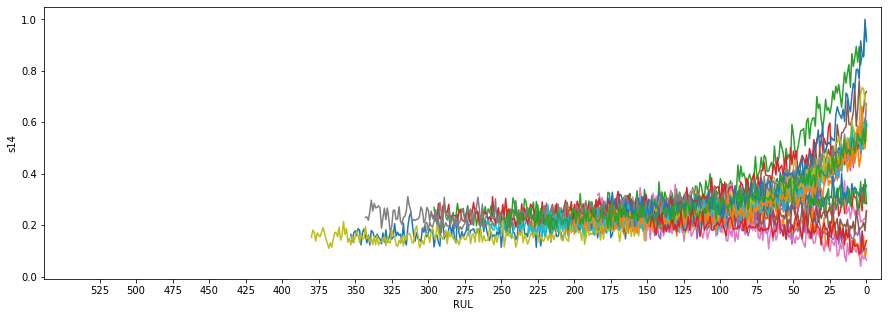

After Moving Average:


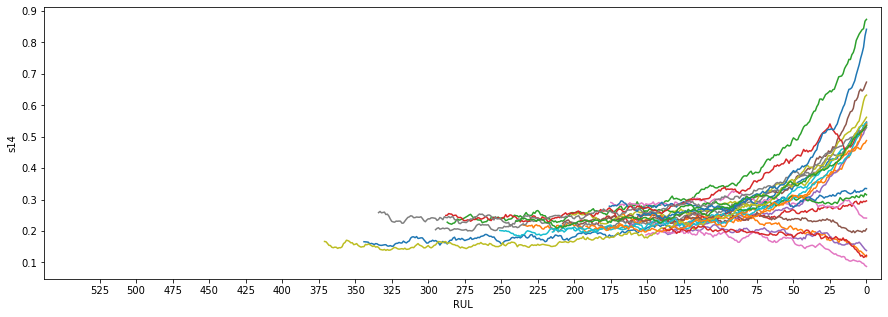

Before:


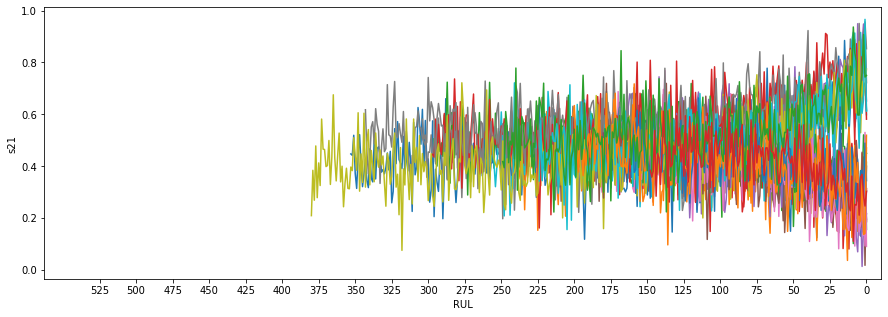

After Moving Average:


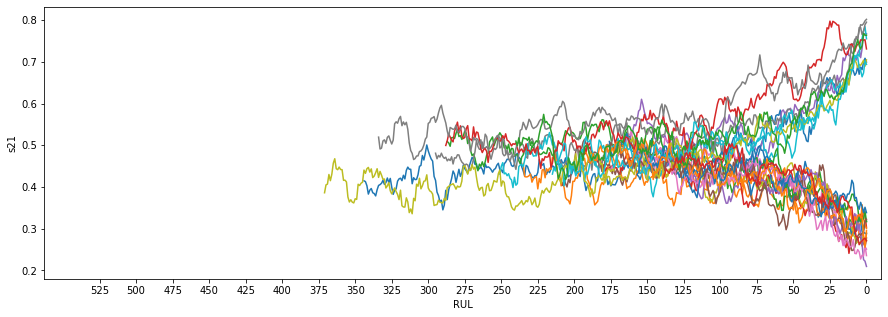

In [202]:
tr_df_copy = tr_df.deep_copy()
plot_copy = pl.Plots(tr_df_copy)
preproc.moving_average(tr_df_copy, shift=10, cols=sensors)
for s in sensors:
    print('Before:')
    plot.reversetimeplot_column(s)
    print('After Moving Average:')
    plot_copy.reversetimeplot_column(s)

Exponential Smoothing

Before:


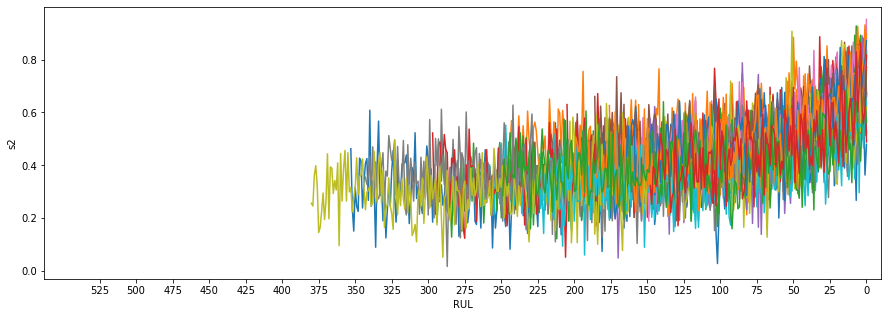

After Exponential Smoothing:


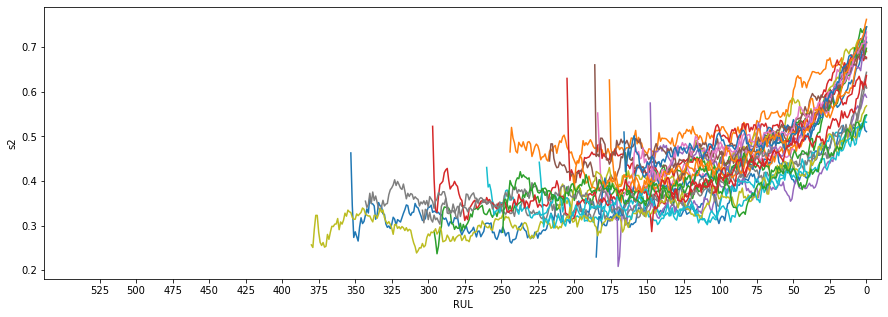

Before:


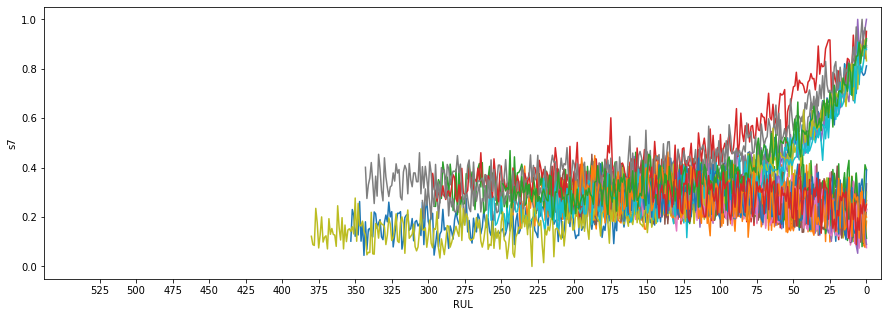

After Exponential Smoothing:


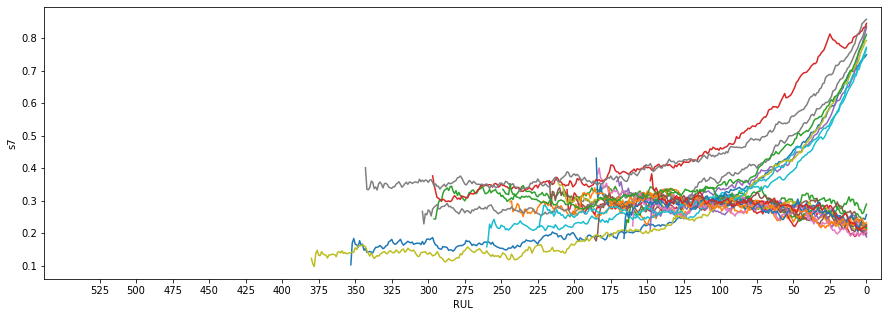

Before:


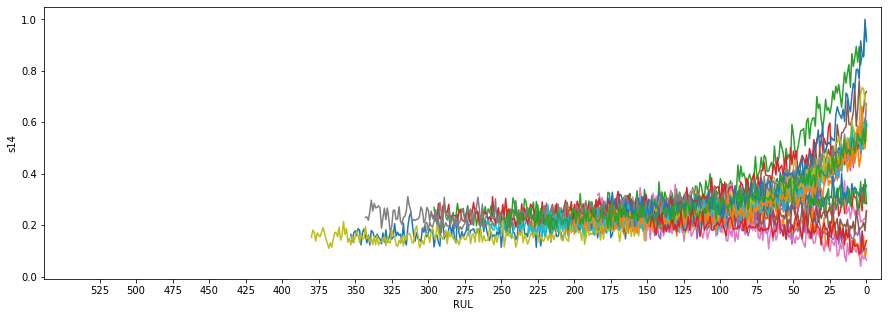

After Exponential Smoothing:


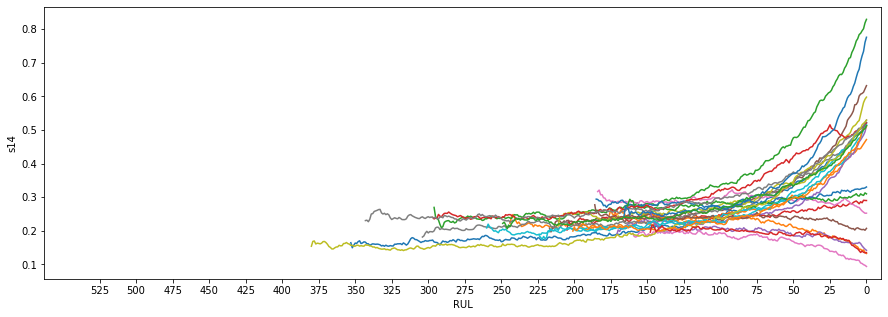

Before:


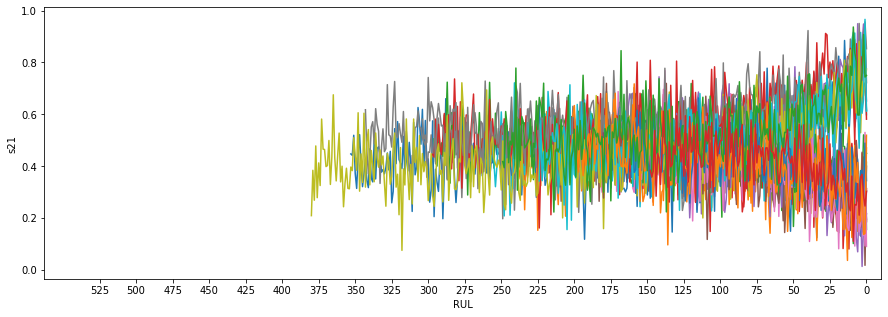

After Exponential Smoothing:


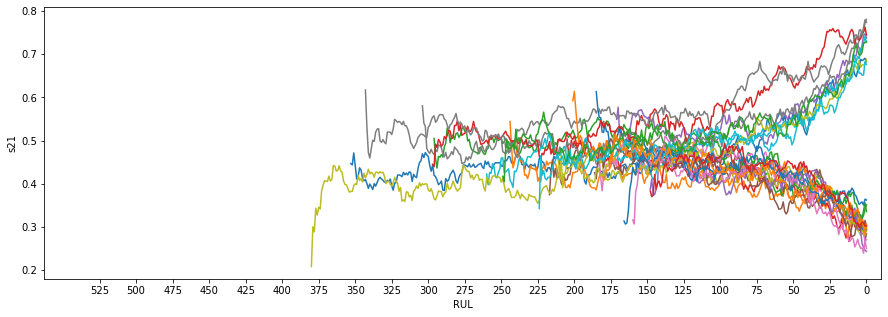

In [203]:
tr_df_copy = tr_df.deep_copy()
plot_copy = pl.Plots(tr_df_copy)
preproc.exponential_smooth(tr_df_copy, alpha = 0.1, cols=sensors)
for s in sensors:
    print('Before:')
    plot.reversetimeplot_column(s)
    print('After Exponential Smoothing:')
    plot_copy.reversetimeplot_column(s)

Fourier

Before:


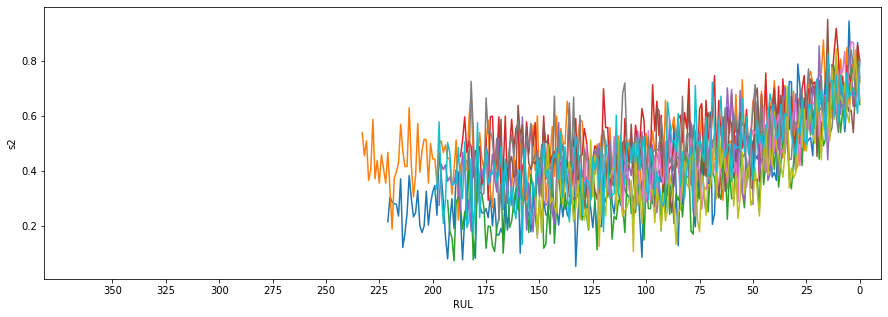

After Fourier:


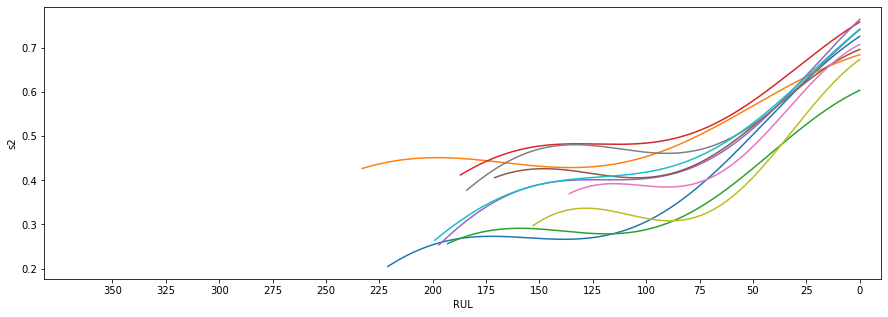

Before:


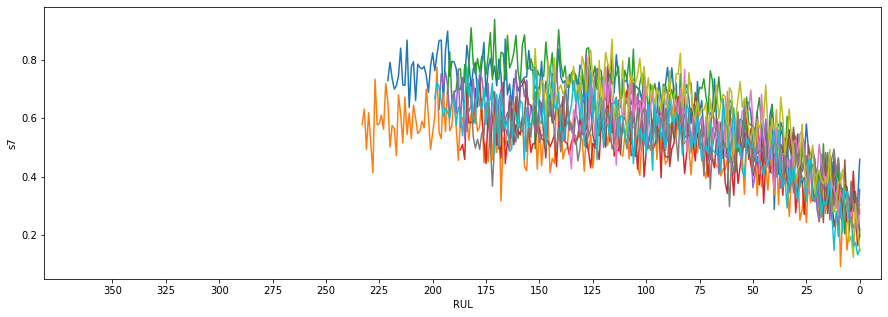

After Fourier:


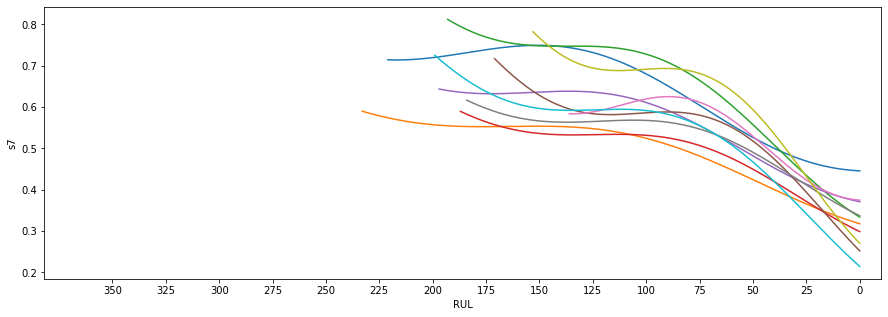

Before:


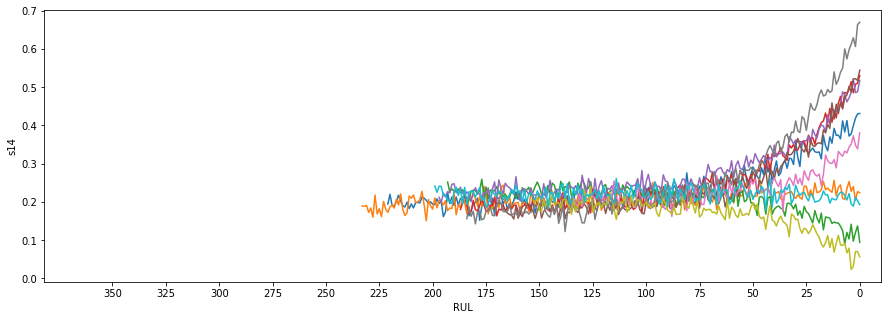

After Fourier:


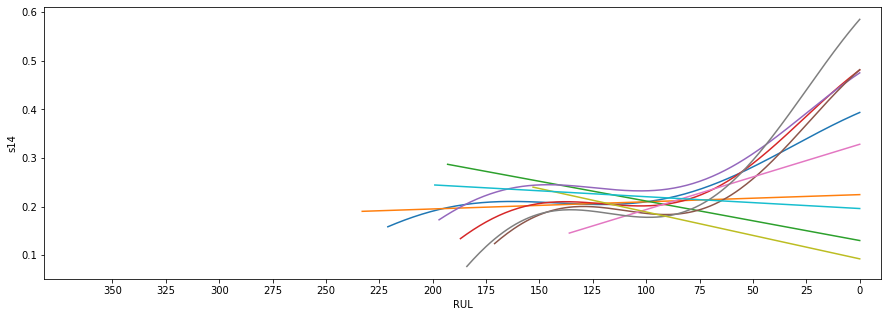

Before:


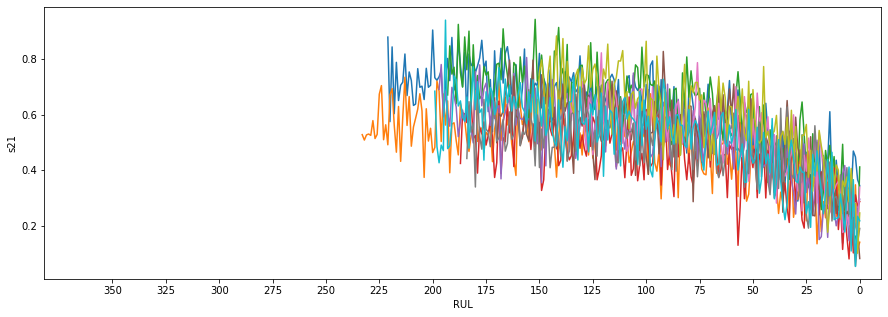

After Fourier:


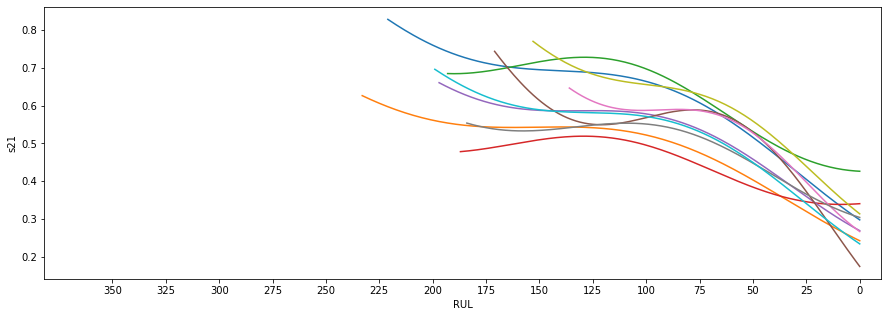

In [56]:
tr_df_copy = tr_df.deep_copy()
plot_copy = pl.Plots(tr_df_copy)
preproc.fourier_denoise_clumns(tr_df_copy, psd_threshold = 0.1, cols = sensors)
for s in sensors:
    print('Before:')
    plot.reversetimeplot_column(s)
    print('After Fourier:')
    plot_copy.reversetimeplot_column(s)